# Класификационни и регресионни дървета

Целите днес: 
- Предварителна обработка (preprocessing) на категорийни променливи - LabelEncoder и OneHotEncoder
- Класификационните дървета (decision trees)
- Random forest 
- Информационна печалба (information gain), ентропия, Gini, мискласификация
- Регуляризация при дърветата 

Преди това: да си припомним малко от предния път.

In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# NumPy и векторизация

Повечето операции в NumPy работят с така наречената векторизация. Това по-лесно се илюстрира с пример:

In [2]:
np.array([1, 2, 3, 4]) * 5

array([ 5, 10, 15, 20])

In [3]:
np.array([1, 2, 3]) * np.array([3, 4, 5])

array([ 3,  8, 15])

In [4]:
np.array([8, 3, 4, 1, 9, 4]) > 4

array([ True, False, False, False,  True, False])

In [5]:
(np.array([8, 3, 4, 1, 9, 4]) > 4).astype(float)

array([1., 0., 0., 0., 1., 0.])

## Кодиране на категорийните данни с числа - LabelEncoder

Ако има категорийни данни (например низове), може да ползваме `LabelEncoder` да ги заменим с числа:

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(["red", "green", "red", "blue", "red", "green"])

colors = ["green", "green", "blue"]

print("transofrmed:", encoder.transform(["green", "green", "blue"])) 
print("inverse:    ", encoder.inverse_transform([0, 1, 2]))

transofrmed: [1 1 0]
inverse:     ['blue' 'green' 'red']


## OneHotEncoder

Може да кодираме категории с label encoder, когато в категориите има някакъв естествен ред (напр. 4 е по-голямо от 2). Ако няма такъв ред обаче, на най-добре е да ползваме one-hot – така създаваме по една характеристика за всяка категория, като тази характеристика има стойности 0 или 1.

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit([[0], 
             [1], 
             [0], 
             [2]])

print(encoder.transform([[0], [1], [1], [2], [0]]).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit([, 
             [1], 
             [0], 
             [2]])

print(encoder.transform([[0], [1], [1], [2], [0]]).toarray())

Но да се върнем към днешната тема!

# Класификационни дървета (decision trees)

Характеристики: 
- Лесен за разбиране и интерпретация 
- Подходящ за проблеми с повече от два класа 

Какво представлява: 
- Класификационното дърво представлява една информационна структура, състояща се от възли, съединени със дъги – клонове. 
- Всеки възел определя някой тест – проверка на стойността на определена характеристика от примера, а всеки клон, излизащ от този възел, съответства на една от възможни стойности на проверяваната характеристика.
- Листата на класификационното дърво представляват стойностите на целевия атрибут. 

Алгоритъм за предсказване:
- Класифицирането на новия пример започва от най-горния възел на дървото (коренът) и се осъществява чрез проверка
за стойността на характеристиката, описана в този възел; 
- след това примерът се “пуска” надолу по клона, който съответства на конкретната стойност на проверявания атрибут в дадения пример. 
- Описаният процес се повтаря в текущия възел, докато примерът не стигне до някое от листата на дървото.

В `scklearn` класификационното дърво е реализирано в класа [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Има и вариант за регресия - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

Основни параметри на алгоритъма:     
* `criteria` - критерий - метрика за намине на оптималното разделяне във възлите        
* `max_depth` - максимална дълбочина на дървото       
* `min_samples_split` - минималния брой примери в даден възел, необходим за разделянето му     
     
`max_depth` и `min_samples_split` са регуляризиращи параметри, тъй като контролират размера на дървото и сътветно сложността на модела. 

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

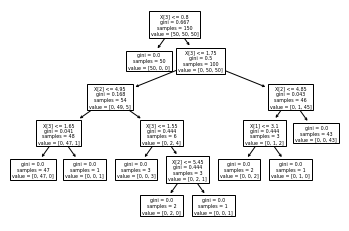

In [45]:
# Пример с iris 
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

In [11]:
def plot_tree_scores(depths):
    train_scores = []
    test_scores = []
    
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_scores, color='blue', label='train score')
    plt.plot(depths, test_scores, color='green', label='test score')
    plt.legend()

In [14]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
# plot_tree_scores(range(1, 6))

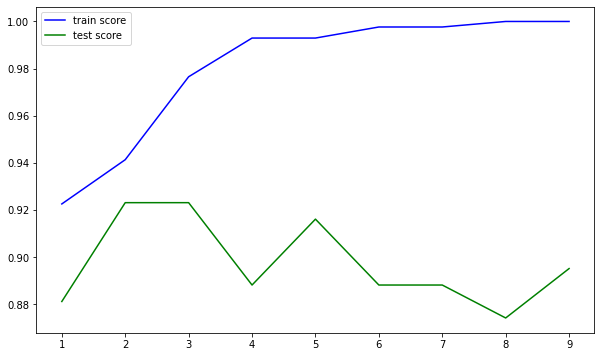

In [15]:
# За breast cancer 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
plot_tree_scores(range(1, 10))

Сега ще разгледаме по-подробно какво се случва с помощта на едни синтетични данни за класификация.

In [16]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100,
                           n_features=2,
                           n_redundant=0, 
                           n_clusters_per_class=2, 
                           random_state=123)

In [17]:
print(x[:4])
print(y[:4])

[[-0.01032243 -0.80566819]
 [-1.10293659  2.21661117]
 [-1.90795358 -0.20839902]
 [ 0.53115524  2.2762704 ]]
[1 0 0 1]


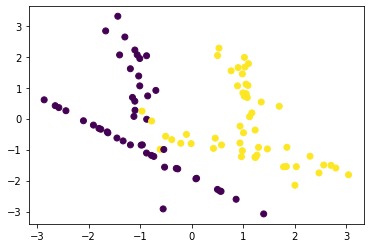

In [70]:
plt.scatter(x[:,0], x[:,1], c=y);

In [18]:
# Plotting decision regions adapted from 
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [72]:
clf = DecisionTreeClassifier().fit(x,y)
print(clf.score(x, y))

#Cross validation
scores = cross_val_score(clf, x, y, cv=5)
print(scores)
print(scores.mean())

1.0
[0.95 0.95 0.9  0.85 1.  ]
0.93


### Как се учи алгоритъмът?

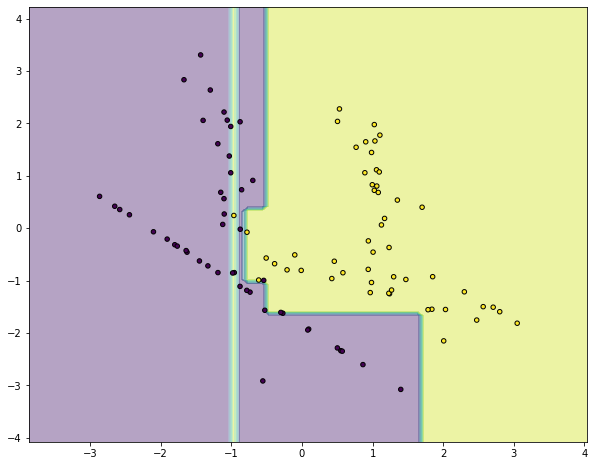

In [73]:
clf = DecisionTreeClassifier().fit(x, y)
plot_boundary(clf, x, y)

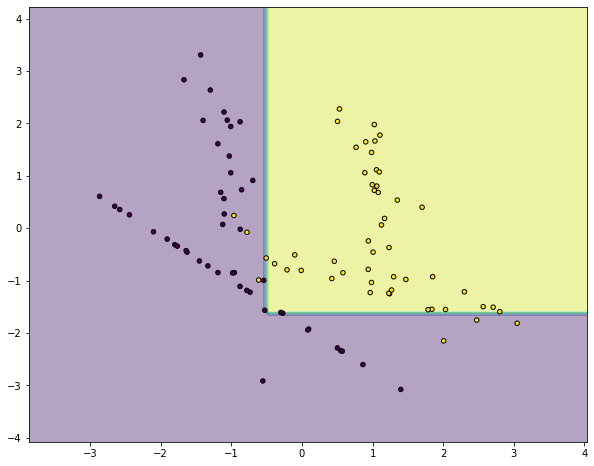

In [22]:
clf = DecisionTreeClassifier(min_samples_split=50).fit(x, y)
plot_boundary(clf, x, y)

[Text(133.92000000000002, 181.2, 'X[0] <= -0.516\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(66.96000000000001, 108.72, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(200.88000000000002, 108.72, 'X[1] <= -1.601\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]')]

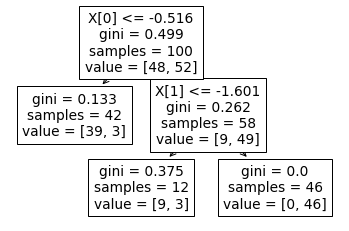

In [23]:
from sklearn import tree
tree.plot_tree(clf)

## В `sklearn` е имплементиран CART алгоритъм. 

### Classification and Regression Trees

L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984

http://scikit-learn.org/stable/modules/tree.html#tree

### Моделът CART е двоично дърво. 
* Всеки елемент от дървото може да има нула, едно или две деца.    

Алгоритъмът работи рекурсивно.      

Критерии за спиране могат да бъдат:    
* Достигната е абсолютна чистота на елементите в дървото. (останали са само един клас данни в последните деца)
* Достигната е максимална дълбочина на дървото. (max_depth)
* Достигнат е минимален брой примери за разделяне. (min_samples_split)

### Алгоритъмът е алчен (greedy):
* Проверява всяка възможна колона (feature) за всички възможни раздвоявания и избира най-доброто.
* Сложност при трениране: $O(n_{features}n_{samples}\log(n_{samples}))$

### Оценяваща функция:
* Оценяващата функция работи, чрез информационна печалба (Information gain):
$$ InformationGain = impurity(parent) - {WeightedAverageBySamplesCount}\sum{impurity(children)}$$

### Измерване на "примеси" (Impurity measures)

#### Класификация:
1. Ентропия (Entropy)
2. Gini
3. Неправилна класификация (Misclassification)

#### Регресия:
1. Средно аритметично от разликата на квадратите (Mean Squared Error)
2. Средно аритметично от абсолютната стойност на разликата (Mean Absolute Error)

### При предвиждане на нов запис, алгоритъмът се спуска по построеното дърво докато стигне възел без наследници.
* При регресия - предвижда средната стойнoст от записите останали в последния елемент.
* При класификация избира класа представен от мнозинството от записи останали в последния елемент.
* Сложност при предвиждане: $O(\log(n_{samples}))$

## Измерване на примесите (impurity)

### Ентропия
- От теория на информацията: мярка за нееднородност на дадено множество от примери.    
За множество S с примери от два класа - положителни и отрицателни:     
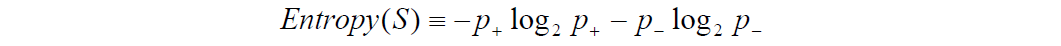   
където:
- $p_+$ e пропорцията на положителните примери в S,
- $p_-$ е пропорцията на отрицателните примери в S.

В общия случай:

 $Entropy(X) = \sum_i{ - p_i  log_2(  p_i )}$
 
 $p_i= \frac{size of class_i}{size of set}$

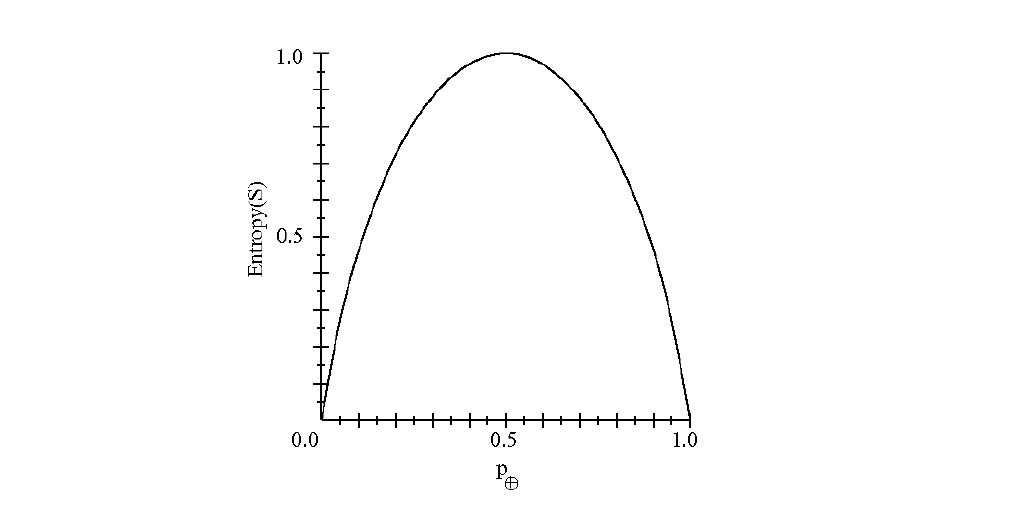

### Пример:

['Лъчо', 'Лъчо', 'Стефан', Стефан']

Лъчо - 2, Стефан - 2

Пропорции:

Лъчо: $\frac{2}{4}$, Стефан: $\frac{2}{4}$

Стойност за Лъчо: 
$$-\frac{2}{4} * log_2(\frac{2}{4})$$
$$-0.5 * -1$$
$$0.5$$

Стефан има същата стойност $0.5$.

Ентропията на множеството е $$entropy=0.5+0.5 = 1.0$$


### Пример 2:

['Круши', 'Круши', 'Круши']

Круши - 3

Пропорции:

Круши $\frac{3}{3} = 1$

$$-1 * log_2(1)$$
$$-1 * 0$$
$$entropy=0$$

In [24]:
def entropy(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    entropy = sum([-subset_count * np.log2(subset_count +0.000000000001) 
                   for subset_count in subset_counts_normalized])
    
    entropy = np.round(entropy, 4)
    print('Entropy for', subset_counts, " is:", entropy)
    return entropy

In [23]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    entropy(sample)

Entropy for [2 0]  is: -0.0
Entropy for [1 0]  is: -0.0
Entropy for [9 1]  is: 0.469
Entropy for [4 4]  is: 1.0


In [24]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    entropy(sample)

Entropy for [2 0 1]  is: 0.9183
Entropy for [6 0 0]  is: -0.0
Entropy for [9 1 0]  is: 0.469
Entropy for [5 5 0]  is: 1.0
Entropy for [5 5 5]  is: 1.585


## Gini

$Gini(X_) = \sum_i p_{i} (1 - p_{i})$,     

където $p_{i}$ е вероятността един елемент да е от клас *i*.

### Пример:

['Лъчо', 'Лъчо', 'Стефан', Стефан']

Лъчо - 2, Стефан - 2

Пропорции:

Лъчо: $\frac{2}{4}$, Стефан: $\frac{2}{4}$

Стойност за Лъчо: 
$$\frac{2}{4} * (1 - \frac{2}{4})$$
$$0.5 * 0.5$$
$$0.25$$

Стефан има същата стойност $0.25$.

$$gini=0.25+0.25 = 0.5$$


### Пример 2:

['Круши', 'Круши', 'Круши']

Круши - 3

Пропорции:

Круши $\frac{3}{3} = 1$

$$1 * (1 - 1)$$
$$1 * 0$$
$$gini=0$$

In [25]:
def gini_impurity(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    impurity = sum([subset_count * (1 - subset_count) 
                    for subset_count in subset_counts_normalized])
    
    print('Gini impurity for', subset_counts, " is:", impurity)
    return impurity

In [26]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0]  is: 0.0
Gini impurity for [1 0]  is: 0.0
Gini impurity for [9 1]  is: 0.18
Gini impurity for [4 4]  is: 0.5


In [27]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0 1]  is: 0.4444444444444445
Gini impurity for [6 0 0]  is: 0.0
Gini impurity for [9 1 0]  is: 0.18
Gini impurity for [5 5 0]  is: 0.5
Gini impurity for [5 5 5]  is: 0.6666666666666667


## Неправилна класификация (Misclassification)

$Misclassification(X) = 1 - \max(p_{i})$


In [28]:
def missclassification_impurity(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    impurity = 1 - max(subset_counts_normalized)
    
    print('Misclassification impurity for', subset_counts, " is:", impurity)
    return impurity

In [29]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    missclassification_impurity(sample)

Misclassification impurity for [2 0]  is: 0.0
Misclassification impurity for [1 0]  is: 0.0
Misclassification impurity for [9 1]  is: 0.09999999999999998
Misclassification impurity for [4 4]  is: 0.5


In [30]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    missclassification_impurity(sample)

Misclassification impurity for [2 0 1]  is: 0.33333333333333337
Misclassification impurity for [6 0 0]  is: 0.0
Misclassification impurity for [9 1 0]  is: 0.09999999999999998
Misclassification impurity for [5 5 0]  is: 0.5
Misclassification impurity for [5 5 5]  is: 0.6666666666666667


## Информационна печалба 

$ InformationGain = impurity(parent) - {WeightedAverageBySamplesCount}\sum{impurity(children)}$

- Очакваното намаляване на примесите, предизвикано от разделяне на примери в съответствие със стойностите на избрания атрибут.

Информационна печалба - при ентропия:      
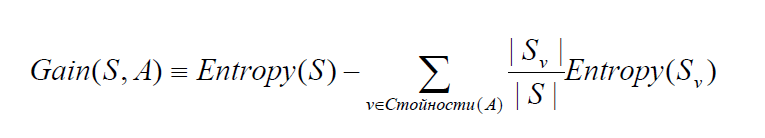 където:     
- *Стойности(A)* е множеството от възможни стойности на атрибута *А*
- $S_v$ - подмножеството на *S*, в което всички примери имат стойността на атрибута *А*, равна на *v*

In [31]:
def information_gain(subsets, parent_entropy=1, f=entropy):
    total_count = sum([sum(i) for i in subsets])
    print("total count:", total_count)
    subsets_impurity = sum((sum(subset) / total_count * f(subset) for subset in subsets))
    IG = parent_entropy - subsets_impurity
    print("Information gain:", IG)
    return IG

In [32]:
#paternt - [2, 2]
subsets = [[2,1], [1]]
for f in [entropy, gini_impurity, missclassification_impurity]:
    information_gain(subsets, parent_entropy=1, f=f); 
    print();

total count: 4
Entropy for [2 1]  is: 0.9183
Entropy for [1]  is: -0.0
Information gain: 0.31127499999999997

total count: 4
Gini impurity for [2 1]  is: 0.4444444444444445
Gini impurity for [1]  is: 0.0
Information gain: 0.6666666666666666

total count: 4
Misclassification impurity for [2 1]  is: 0.33333333333333337
Misclassification impurity for [1]  is: 0.0
Information gain: 0.75



In [33]:
subsets = [[2], [2]]
for f in [entropy, gini_impurity, missclassification_impurity]:
    information_gain(subsets, parent_entropy=1, f=f); 
    print();

total count: 4
Entropy for [2]  is: -0.0
Entropy for [2]  is: -0.0
Information gain: 1.0

total count: 4
Gini impurity for [2]  is: 0.0
Gini impurity for [2]  is: 0.0
Information gain: 1.0

total count: 4
Misclassification impurity for [2]  is: 0.0
Misclassification impurity for [2]  is: 0.0
Information gain: 1.0



[Text(133.92000000000002, 181.2, 'X[0] <= -0.516\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(66.96000000000001, 108.72, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(200.88000000000002, 108.72, 'X[1] <= -1.601\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]')]

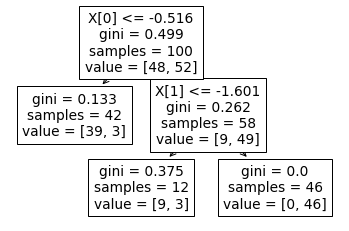

In [36]:
tree.plot_tree(clf)

In [35]:
gini_impurity([48,52])
gini_impurity([9, 49])
gini_impurity([39, 3])
gini_impurity([0, 46]);

Gini impurity for [48 52]  is: 0.4992
Gini impurity for [ 9 49]  is: 0.2621878715814506
Gini impurity for [39  3]  is: 0.13265306122448978
Gini impurity for [ 0 46]  is: 0.0


### Плюсове: 
* Дървото е лесно за интерпретация.
* Лесно се справя с ирелевантни атрибути (*gain =0*).
* Може да се справи с липсващи данни. (Не и за текущата имплементация в sklearn).
* Компактно представяне на модела.
* Бърз при предсказване: *O(дълбочината на дървото)*.
* Може да прави класификация с повече класове без допълнителни трикове.
* Лесен за използване и дава добри резултати с малко експерименти.

### Минуси:
* Разделя атрибутите само по осите. 
* Алчен (greedy) - може да не открие най-доброто дърво.
* Експоненциално нарастване на възможните дървета.
* Овърфитва силно.

## Въпроси по DT?

## Random Forest

- Пример за обучение чрез ансамбли (ensemble learning)
- Обучава множество от дървета (гора) на случайни подмножества от данните и осреднява резултатите

In [28]:
from sklearn.ensemble import RandomForestClassifier

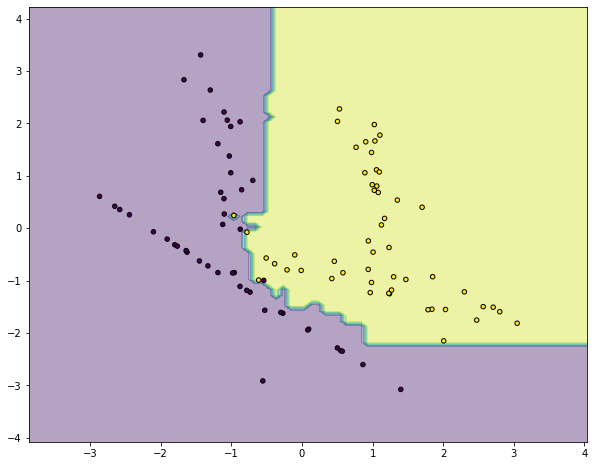

In [29]:
clf = RandomForestClassifier(random_state=23).fit(x,y) # без настройка на параметрите
plot_boundary(clf, x, y)

## Параметри за RF:

* `n_estimators`: брой дървета - 10, 100, 1000 
* `criterion`: за всички дървета  - gini, entropy
* `max_features`: Колко фичъра да се пробват при търсене на най-добро разделяне. По подразбиране - `sqrt(n_features)` - различни при всяко ново търсене.
* `max_depth`: Максимална дълбочина на дърветата
* `min_samples_split`: Минимален брой семпли за да може да се раздели възела
* `bootstrap` - Втори параметър за случайност - random sampling with replacement. Тегли същия брой семпли като оригиналния сет.
* `n_jobs` - Тренира по няколко дървета едновременно, но използва повече памет.
* `random_state` - възпроизведими експерименти

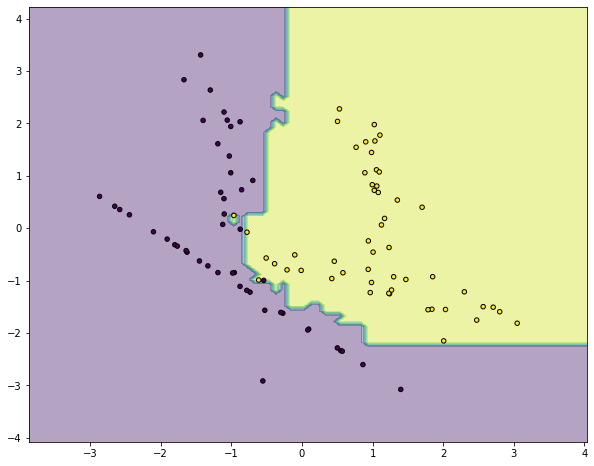

In [33]:
clf = RandomForestClassifier(random_state=100).fit(x,y)
plot_boundary(clf, x, y)

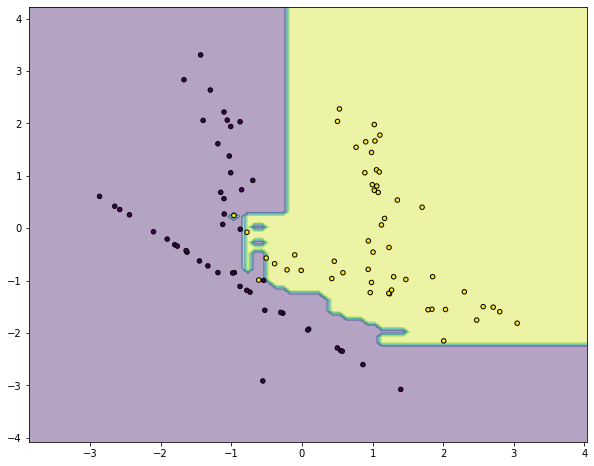

In [36]:
# Тъй като е случайно, можем да получим и различна граница 
clf = RandomForestClassifier(n_estimators=10).fit(x,y)
plot_boundary(clf, x, y)

### Значимост на фичърите в RF - Сходно на теглата на параметрите при линейни модели.
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_forest_importances_001.png)
http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

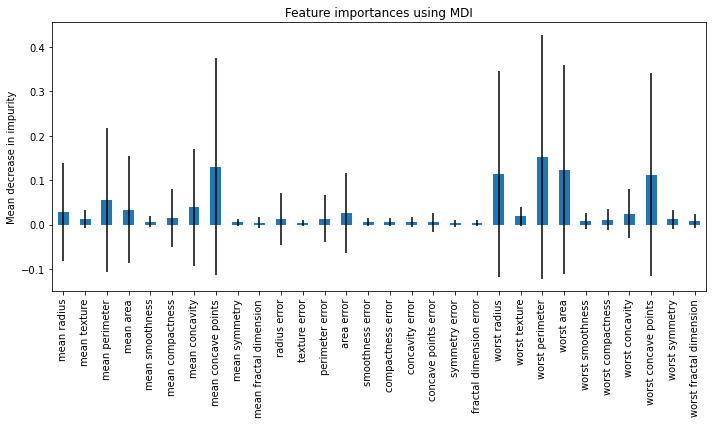

In [90]:
#За breast cancer
import pandas as pd
data = load_breast_cancer()
forest = RandomForestClassifier().fit(data.data, data.target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=data.feature_names)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Задача: 
    
Изпробвайте влиянието върху генерализацията на DT и RF при промяна на параметрите `min_samples_split` и `n_estimators` (за RF) за избран от вас набор от данни.

### Прочетете документацията:
* http://scikit-learn.org/stable/modules/tree.html
* http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [39]:
# Решение 
def plot_tree_scores(n_estimators):
    train_scores = []
    test_scores = []
    
    for n in n_estimators:
        clf = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, train_scores, color='blue', label='train score')
    plt.plot(n_estimators, test_scores, color='green', label='test score')
    plt.legend()

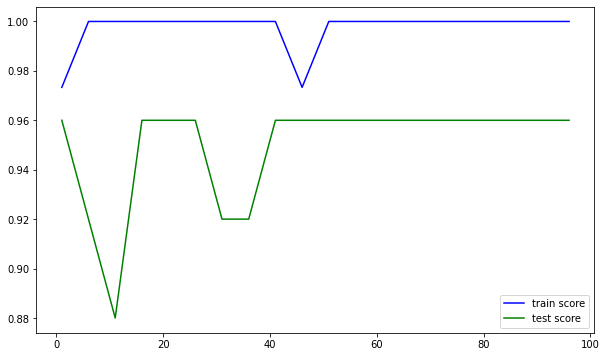

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
plot_tree_scores(range(1, 100, 5))